# Table of Contents
## 1 Import Libraries and Data
## 2 Data Cleaning 
## 3 Data Prep for Regression Analysis 
## 4 Regression Analysis 

# 1 Import Libraries and Data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [42]:
# Create a path
path = r'/Users/alejandrosalgado/Desktop/Final Project'

In [43]:
# Load data
df = pd.read_pickle(r'/Users/alejandrosalgado/Desktop/Final Project/Boat_Orders_clean_2.pkl')

In [44]:
df.shape

(6001, 12)

In [45]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City,USD_price,Pricing Category
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40,Low-priced
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94,Low-priced
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00,Low-priced
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00,Low-priced
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00,Low-priced


In [46]:
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City,USD_price,Pricing Category
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40,Low-priced
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94,Low-priced
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00,Low-priced
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00,Low-priced
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00,Low-priced
...,...,...,...,...,...,...,...,...,...,...,...,...
5996,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,1299,Switzerland,Rhein,5400.00,Low-priced
5997,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,1917,Switzerland,Lake of Zurich,5398.92,Low-priced
5998,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,288,Switzerland,Bielersee,5346.00,Low-priced
5999,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,Germany,Nordrhein-Westfalen,4768.94,Low-priced


# 2 Data Cleaning 

In [8]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Country', 'City',
       'USD_price', 'Pricing Category'],
      dtype='object')

In [9]:
# Rename the columns
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [10]:
# Check for missing values
df.isnull().sum()

Boat Type           0
Manufacturer        0
Type                0
Year Built          0
Length              0
Width               0
Material            0
7days_views         0
Country             0
City                0
USD_price           0
Pricing Category    0
dtype: int64

In [11]:
# check for duplicates
dups = df.duplicated()

In [12]:
dups.shape

(6001,)

In [13]:
df.shape

(6001, 12)

In [14]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,7days_views,Country,City,USD_price,Pricing Category
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40,Low-priced
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94,Low-priced
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00,Low-priced
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00,Low-priced
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00,Low-priced


# Extreme Value Check

/Users/alejandrosalgado/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

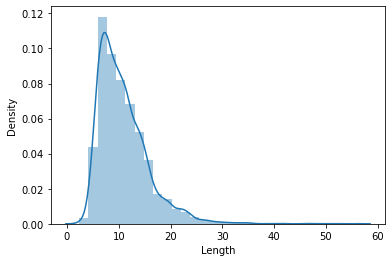

In [15]:
# extreme value check
sns.distplot(df['Length'], bins=30)

In [16]:
# Check for mean
df['Length'].mean()

10.834530911514786

In [17]:
# Check for median
df['Length'].median() 

9.88

In [18]:
# Check for max
df['Length'].max() 

56.0

# 3. Data prep for Regression Analysis

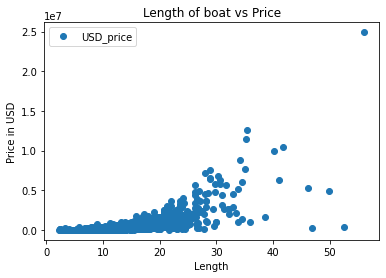

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'Length', y='USD_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in USD')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Length'].values.reshape(-1,1)
y = df['USD_price'].values.reshape(-1,1)

In [23]:
X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [24]:
y

array([[3699.4 ],
       [3602.94],
       [3780.  ],
       ...,
       [5346.  ],
       [4768.94],
       [4082.4 ]])

In [25]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Hypothesis

## The higher the boat length, the higher the price

# 4 Regression Analysis 

In [26]:
# Create a regression object

regression = LinearRegression() 

In [27]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

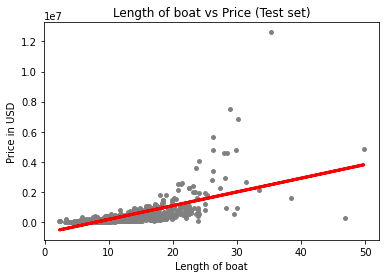

In [30]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in USD')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[91213.14162527]]
Mean squared error:  204303144370.84543
R2 score:  0.3771012337298192


The graph aligns with my hypotheses of the higher the boat length, the higher the price. The relationship is positive since the slope is positive. The MSE is high at 188101017128 , so the regression line does not represent the data. Also, the R2 score of 0.38 so it indicates a poor fit.

In [33]:
y_predicted

array([[ 203520.91823237],
       [-149473.9398574 ],
       [ 220851.41514117],
       ...,
       [-143089.01994364],
       [  11973.32081932],
       [  -3532.91325698]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,74094.0,2.035209e+05
1,59292.0,-1.494739e+05
2,95400.0,2.208514e+05
3,41234.0,8.038318e+04
4,159000.0,-5.917293e+04
5,198220.0,9.406515e+04
6,36570.0,-8.744900e+04
7,609500.0,1.202305e+06
8,105883.4,1.197332e+04
9,16430.0,-1.020431e+05


## Compare how the regression fits the training set

In [36]:
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[91213.14162527]]
Mean squared error:  295916280711.5342
R2 score:  0.40103978789603356


There could be data bias in the model as there are other factors that determine the length of the boat and price. The values are identical to the model. Positive relationship, extremely high MSE and a low R2. This all indicates that the length of the boat is not a good determinant of the cost of the boat.

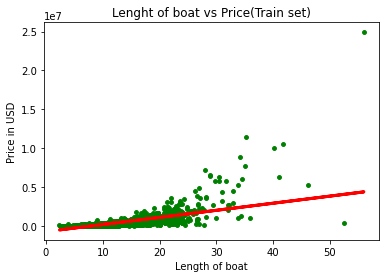

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in USD')
plot_test.show()